<a href="https://colab.research.google.com/github/Kangin-Lee/ML_Example/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.4 MB/s eta 0:00:00


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import mglearn

X.shape: (26, 2)


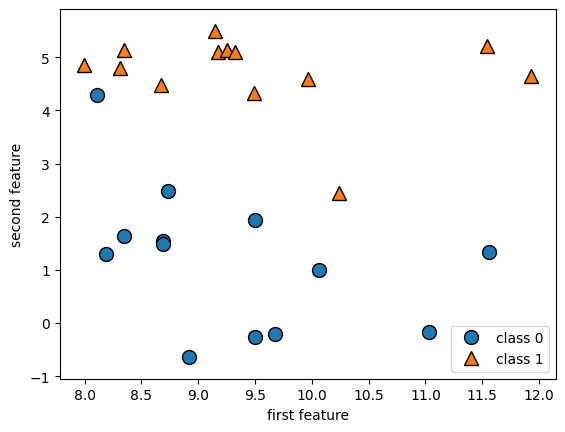

In [11]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["class 0", "class 1"],loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'target')

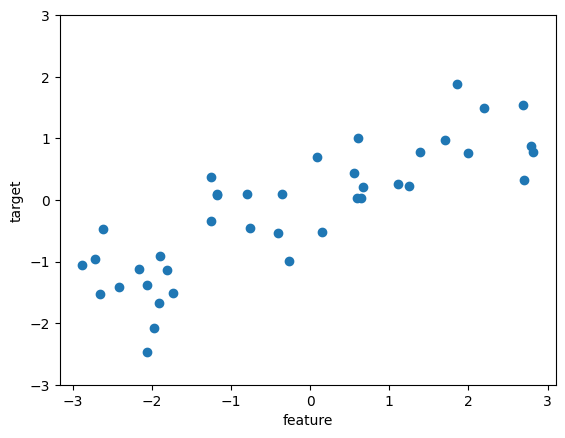

In [12]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [13]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.key():\n", cancer.keys())

cancer.key():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
print("data state:", cancer.data.shape)

data state: (569, 30)


In [15]:
print("class sample number:\n",
      {n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

class sample number:
 {'malignant': 212, 'benign': 357}


In [16]:
print("featuer name:\n:",cancer.feature_names)

featuer name:
: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
print("data shape:",boston.data.shape)

ImportError: ignored

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
print("data shape:",boston.data.shape)

ImportError: ignored

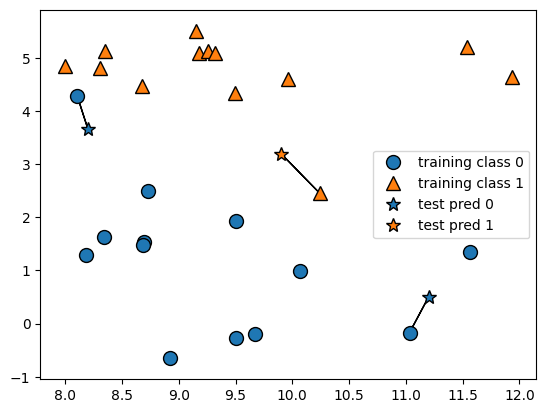

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

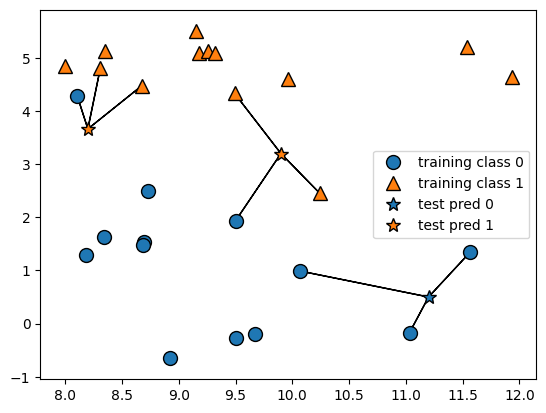

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [21]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
print("test set predic:", clf.predict(X_test))

test set predic: [1 0 1 0 1 0 0]


In [25]:
print("test set accur:{:.2f}",format(clf.score(X_test, y_test)))

test set accur:{:.2f} 0.8571428571428571


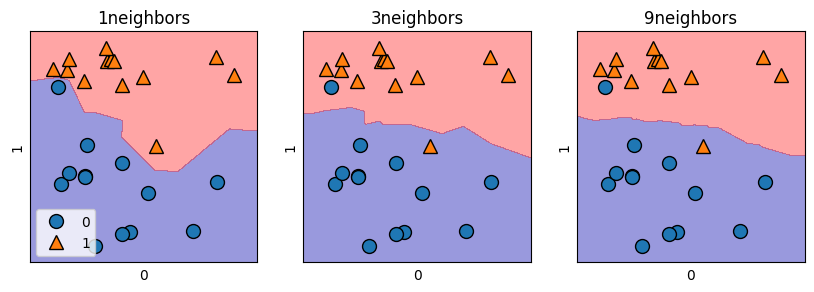

In [26]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps = 0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}neighbors".format(n_neighbors))
    ax.set_xlabel("0")
    ax.set_ylabel("1")
axes[0].legend(loc=3)

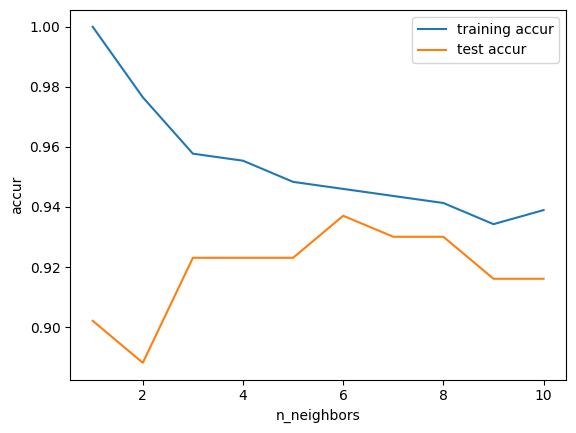

In [27]:
from sklearn.datasets import load_breast_cancer


cancer= load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accur")
plt.plot(neighbors_settings, test_accuracy, label="test accur")
plt.ylabel("accur")
plt.xlabel("n_neighbors")
plt.legend()

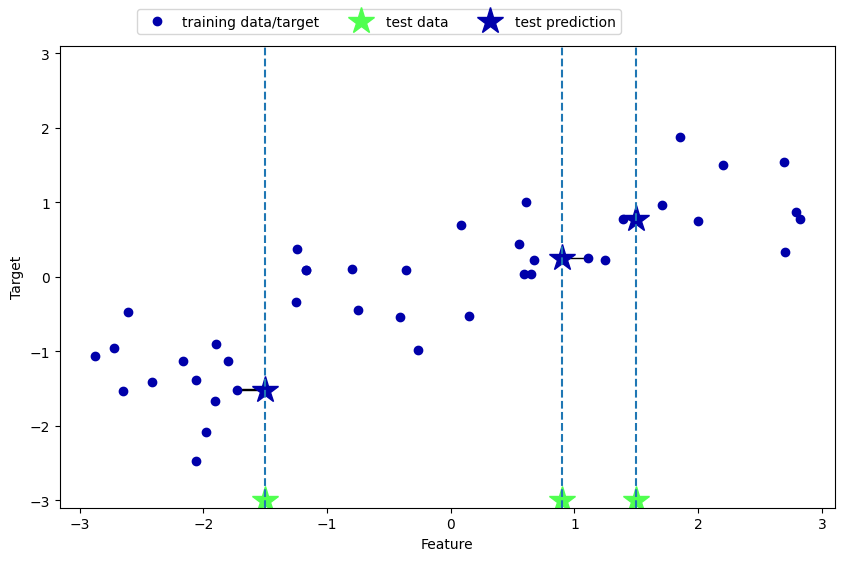

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

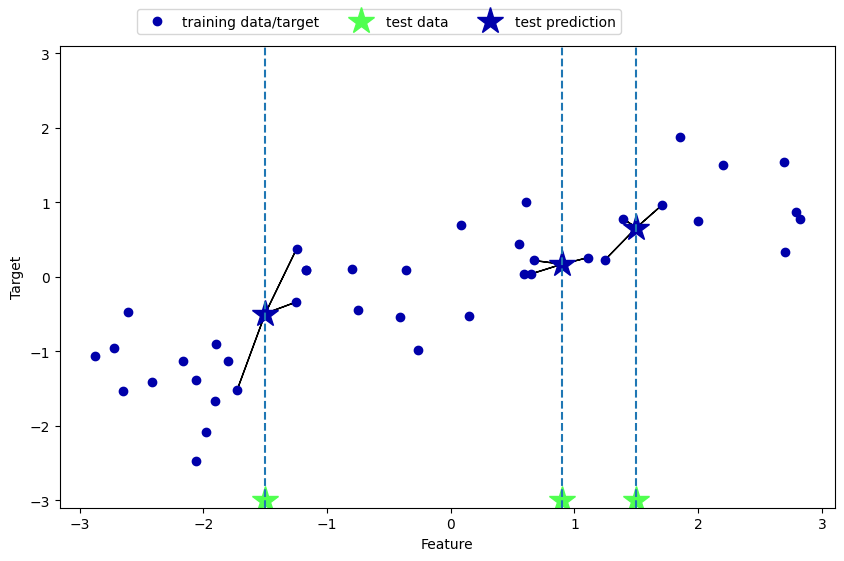

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

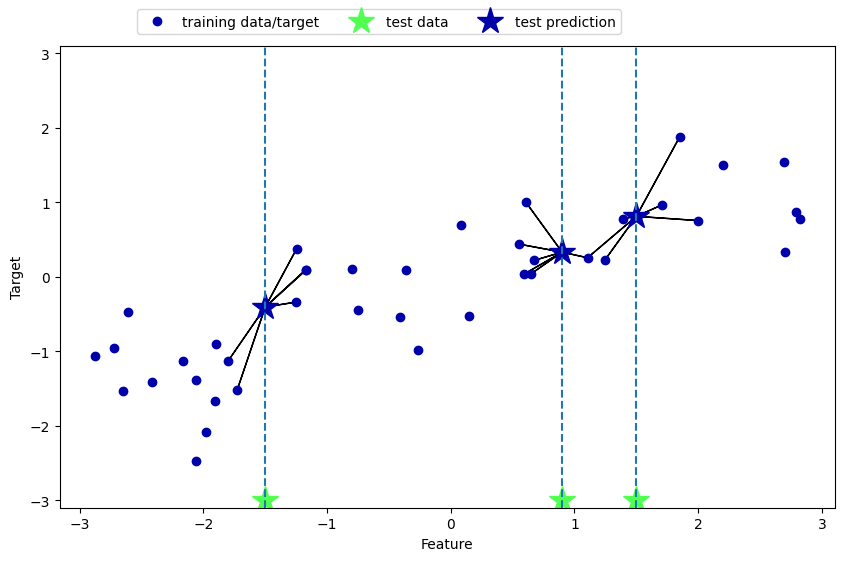

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=6)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [33]:
print("test set predict:\n", reg.predict(X_test))

test set predict:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [32]:
print("test set R^2:{:.2f}".format(reg.score(X_test, y_test)))

test set R^2:0.83


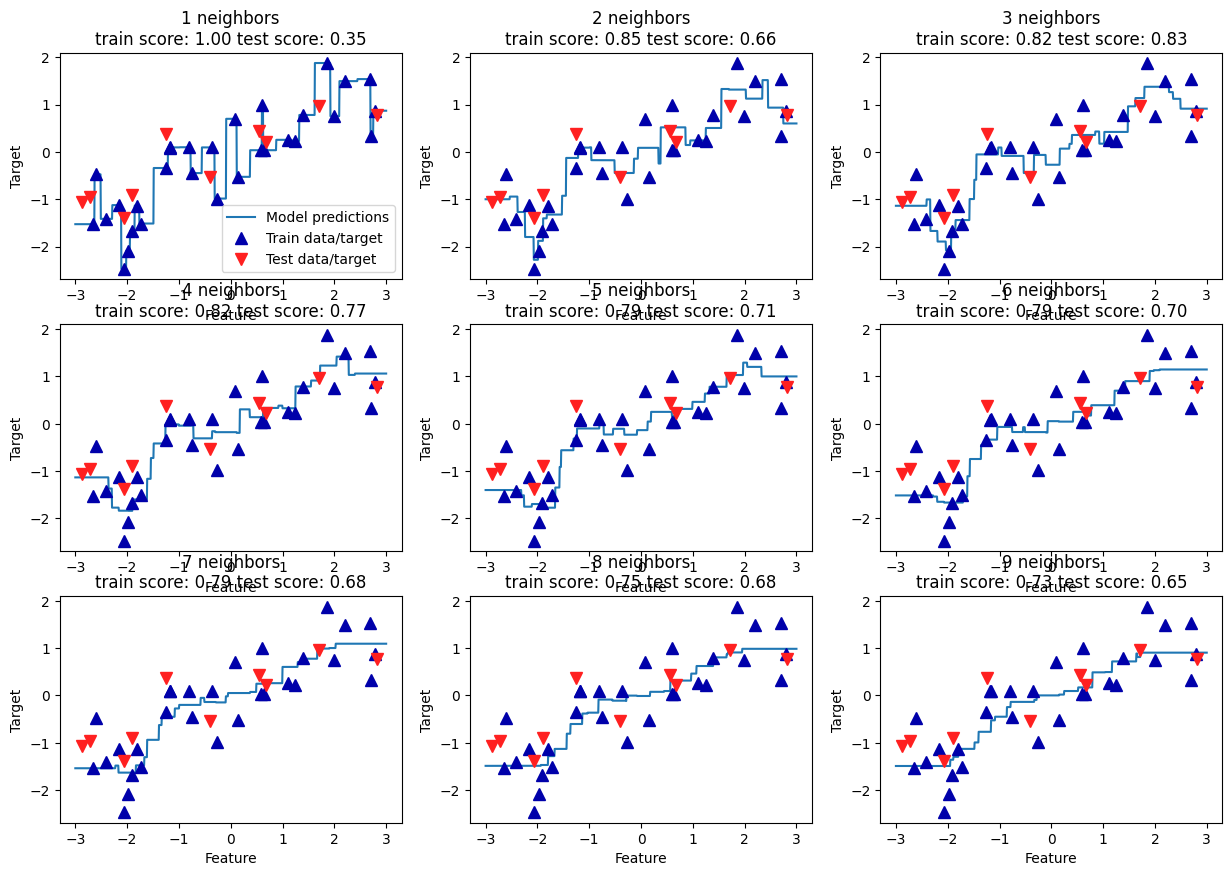

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # 수정된 부분

for n_neighbors, ax in zip(neighbors, axes.ravel()):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)

    ax.set_title("{} neighbors\ntrain score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0, 0].legend(["Model predictions", "Train data/target", "Test data/target"], loc="best")